<a href="https://colab.research.google.com/github/Carhuacusma/CC61_PDI_TA4_u201818067/blob/main/PDI_TA4_u201818067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento Digital de Imágenes - Detección y segmentación

## Objetivos:

##Ejercicio: Detección y Segmentación

### Detección de descontinuidades

En imágenes, las descontinuidades buscadas son puntos, segmentos de rectas, bordes y uniones

"La representación de los bordes en una imagen reduce significativamente la cantidad de data a ser procesada, reteniendo información esencial sobre las formas de los objetos en escena"

###Canny

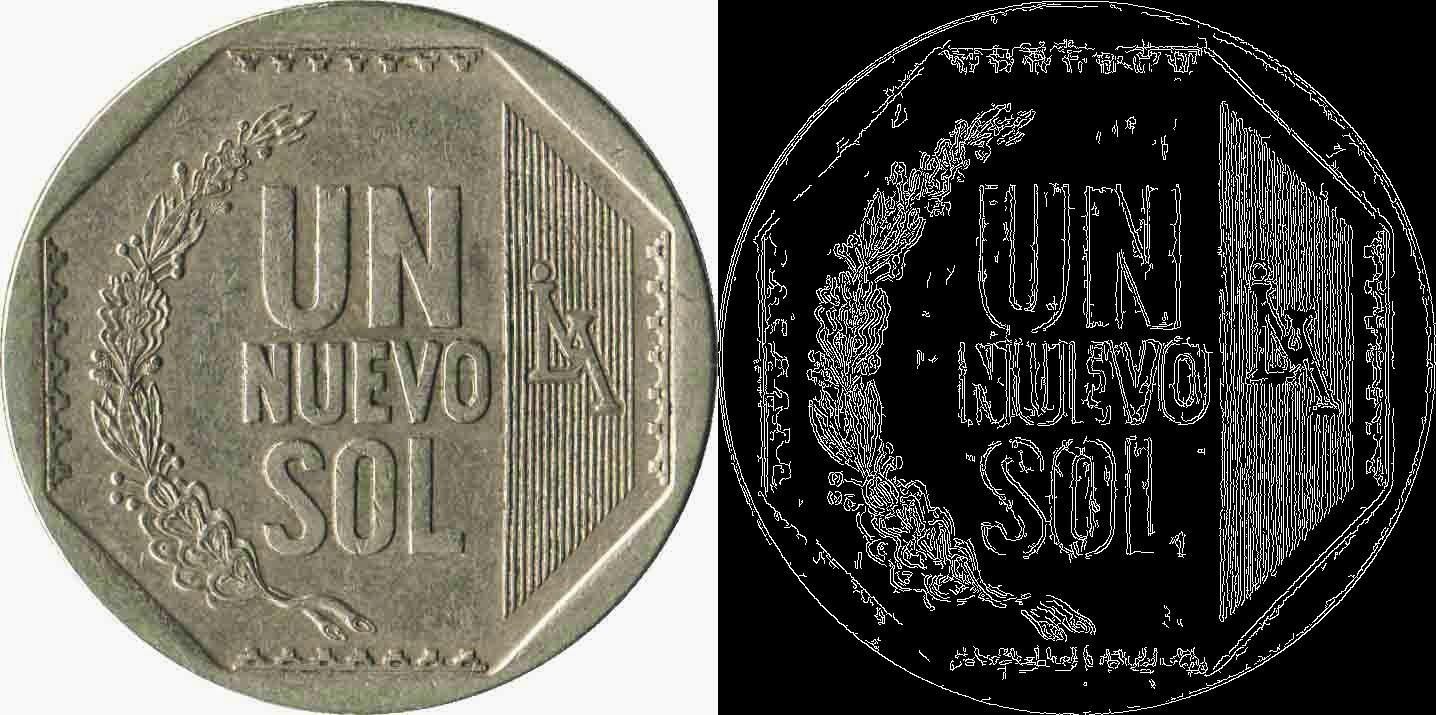

## Código

###Importando librerías

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from skimage import io, filters, img_as_ubyte
from google.colab.patches import cv2_imshow

###Operadores de Detección de bordes

#### Operador de Roberts

In [ ]:
def roberts(baw, arr=[True for _ in range(2)]): # baw: Imagen en escala de grises; x,y: booleans de en qué eje aplicar
  x = arr[0]
  y = arr[1]
  m_x = np.array([[ 1, 0],
                  [ 0,-1]])
  m_y = np.array([[-1, 0],
                  [ 0, -1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Sobel / Prewitt

In [ ]:
def sobel_prewitt(baw, c=2, arr=[True for _ in range(2)]):
  x = arr[0]
  y = arr[1]
  m_x = np.array([[-1, 0, 1],
                  [-c, 0, c],
                  [-1, 0, 1]])
  m_y = np.array([[ 1, c, 1],
                  [ 0, 0, 0],
                  [-1,-c,-1]])
  if x and y:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)
  elif x:
    return cv2.filter2D(baw,-1,m_x)
  elif y:
    return cv2.filter2D(baw,-1,m_y)
  else:
    return cv2.filter2D(baw,-1,m_x) + cv2.filter2D(baw,-1,m_y)

#### Operador de Kirsch

In [ ]:
def kirsch(baw,arr=[True for _ in range(8)]):
  mascaras = [np.array([[ 5, 5, 5],
                        [-3, 0,-3],
                        [-3,-3,-3]]),
              np.array([[-3, 5, 5],
                        [-3, 0, 5],
                        [-3,-3,-3]]),
              np.array([[-3,-3, 5],
                        [-3, 0, 5],
                        [-3,-3, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0, 5],
                        [-3, 5, 5]]),
              np.array([[-3,-3,-3],
                        [-3, 0,-3],
                        [ 5, 5, 5]]),
              np.array([[-3,-3,-3],
                        [ 5, 0,-3],
                        [ 5, 5,-3]]),
              np.array([[ 5,-3,-3],
                        [ 5, 0,-3],
                        [ 5,-3,-3]]),
              np.array([[ 5, 5,-3],
                        [ 5, 0,-3],
                        [-3,-3,-3]])]
  print(arr)    
  final = np.zeros(baw.shape,dtype=np.uint8)
  for i in range(8):
    if arr[i]:
      filtrada = cv2.filter2D(baw,-1,mascaras[i])
      final = final + filtrada
  return final

#### Función para edgeDetection

In [ ]:
def edgeDetection(imagen, operador, arr = [True for _ in range(8)], c=2, usaC = False):
  # Si la imagen no está en escala de grises, convertirla a escala de grises
  if len(imagen.shape) > 2:
    imagen = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY) # Asume entrada con io.imread()
  filtrada = [] # >> Imagen Filtrada
  if usac:
    filtrada = operador(imagen,c,arr)
  else:
    filtrada = operador(imagen,arr)
  if type(filtrada[0][0]) != np.uint8: #...Si el 'operador' es función de skimage devuelve float
    filtrada = img_as_ubyte(filtro) #..... Homogeneizar para trabajar en np.uint8 ...........
  return filtrada

### Transformada de Hough

####Círculos

In [77]:
def HoughCirculo(filtrada, distMin, maxCanny, lessError, minRadio, maxRadio, orig = [[0 for _ in range(2)]]):
  circles = cv2.HoughCircles(filtrada, cv2.HOUGH_GRADIENT, 1, distMin, 
                             param1=maxCanny, param2=lessError, minRadius=minRadio, maxRadius=maxRadio)
  aux = [] # Imagen auxiliar para imagen con circulos encima
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = filtrada.copy()
    aux = cv2.cvtColor(aux,cv2.COLOR_GRAY2BGR)
  j = 1
  if circles is not None:
    circles = np.uint16(np.around(circles[0]))
    for i in circles:
      center = (i[0],i[1])
      radius = i[2]
      #cv2.circle(aux, center, 1, (0, 100, 100), 2) #Dibujar centro
      ## 
      aux = cv2.putText(aux, str(j), center, cv2.FONT_HERSHEY_SIMPLEX, 1, 
                        (255,0,0), 2, cv2.LINE_AA) 
      ## 
      j += 1
      cv2.circle(aux, center, radius, (255, 0, 255), 2) #Dibuja los circulos
  return circles, aux

#### Líneas

In [19]:
def HoughLineas(filtrada,minLinea = 100,maxGap = 10,orig = [[0 for _ in range(2)]]):
  aux = []
  if len(orig) > 2:
    aux = orig.copy()
  else:
    aux = cv2.cvtColor(filtrada,cv2.COLOR_GRAY2BGR)
  lines = cv2.HoughLinesP(filtrada,1,np.pi/180,100,minLinea,maxGap)
  if lines is not None:
    for x1,y1,x2,y2 in lines[0]:
      cv2.line(aux,(x1,y1),(x2,y2),(0,255,0),2)
    return lines[0], aux
  return [0]

###Funciones adicionales para determinar tipo de moneda

La función *homoShape()* recibe dos imágenes, se asumen cuadradas o del mismo ratio, y reduce la imagen más grande a las dimensiones de la más pequeña.

In [91]:
def homoShape(im1,im2):
  M1,_ = im1.shape
  M2,_ = im2.shape
  minM = min(M1,M2)
  if M1 != minM:
    im1 = cv2.resize(im1,im2.shape)
  elif M2 != minM:
    im2 = cv2.resize(im2,im1.shape)
  return im1,im2

La función *separarMonedas()* recibe como entrada un arreglo de círculos (en formato [posición x, posición y, radio] ) y la imagen filtrada o en blanco o negro que se quiere recortar. Retorna un arreglo de imágenes cuadradas de las monedas según el arreglo de entrada.

In [21]:
def separarMonedas(circulos, filtrada):
  monedas = []
  for circulo in circulos:
    cx, cy, radio = circulo
    im = filtrada[cy-radio:cy+radio,cx-radio:cx+radio]
    monedas.append(im)
  return monedas

Se implementa coeficiente de correlación de Pearsson, con un umbral variable para ajustar la eficiencia. Cambia el tamaño de la imagen más grande para poder realizar la comparación.

In [57]:
def compararImPearsson(im1,im2,umbral=0.5):
  im1,im2=homoShape(im1,im2) # Reducir la imagen más grande para que tengan mismo shape
  desvEst1 = np.std(im1)
  desvEst2 = np.std(im2)
  covarianza = np.cov(im1.flatten(),im2.flatten(),bias=True)[0][1]
  r = abs(covarianza/(desvEst1*desvEst2))
  print(r)
  if r > umbral: # r > 0.5 es una correlacion alta
    return True
  else:
    return False

In [103]:
def compararImMatch(im1,im2_t,umbral=0.5,cv2Coef = cv2.TM_CCOEFF_NORMED): #Se asume shape es cuadrado
  im1,im2_t = homoShape(im1,im2_t)
  s,_ = im2_t.shape
  pQ = round(0.25*s)
  uQ = round(0.75*s)
  temp = im2_t[pQ:uQ,pQ:uQ] # Template: 1/4 central de la imagen
  res = cv2.matchTemplate(im1,temp,cv2Coef)
  loc = np.where(res >= umbral)

  s = round(s/2)
  auxIm = cv2.cvtColor(im1,cv2.COLOR_GRAY2BGR)
  for pt in zip(*loc[::-1]):
    cv2.rectangle(auxIm, pt, (pt[0] + s, pt[1] + s), (0,0,255), 2)
  return loc,auxIm

###Algoritmo

In [104]:
aux,auxIm = compararImMatch(df[0],df[0],0.6)

In [100]:
print(aux)

(array([67, 68, 69, 70, 71, 72, 73, 73, 74, 74, 74, 75, 75, 75, 76, 76, 76,
       77, 77, 78, 79, 80, 81, 82, 83, 84]), array([75, 75, 75, 75, 75, 75, 75, 76, 74, 75, 76, 74, 75, 76, 74, 75, 76,
       74, 75, 75, 75, 75, 75, 75, 75, 75]))


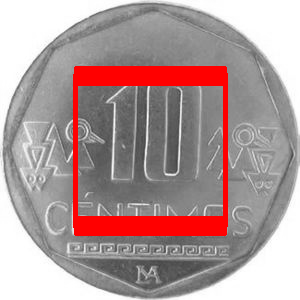

In [105]:
cv2_imshow(auxIm)

In [99]:
for pt in zip(*aux[::-1]):
    print(pt)

(75, 67)
(75, 68)
(75, 69)
(75, 70)
(75, 71)
(75, 72)
(75, 73)
(76, 73)
(74, 74)
(75, 74)
(76, 74)
(74, 75)
(75, 75)
(76, 75)
(74, 76)
(75, 76)
(76, 76)
(74, 77)
(75, 77)
(75, 78)
(75, 79)
(75, 80)
(75, 81)
(75, 82)
(75, 83)
(75, 84)


###Cargar Imágenes de Referencia

In [85]:
repos = "https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/"
df = []
df_baw = []
for i in range(5):
  dfFile = "df%s.jpg"%(i)
  url = "%s%s"%(repos,dfFile)
  imdf = io.imread(url)
  imdf = cv2.cvtColor(imdf,cv2.COLOR_RGB2GRAY)
  print(imdf.shape)
  df.append(imdf)

(300, 300)
(300, 300)
(300, 300)
(715, 718)
(400, 400)


In [37]:
df_canny = [0 for _ in range(len(df))]
def dfCanny(ind, minC, maxC):
  df_canny[ind] = cv2.Canny(df[ind],minC,maxC)
  plt.imshow(df_canny[ind],cmap='gray')

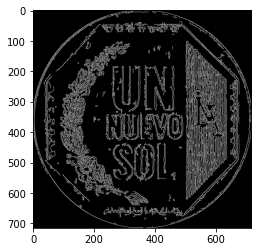

In [86]:
#@title Canny para Monedas de Referencia { run: "auto" }
op_ind = 3#@param{type:"slider", min:0, max:4, step:1}
minC = 100#@param{type:"slider", min:0, max:254, step:1}
maxC = 255#@param{type:"slider", min:0, max:255, step:1}
dfCanny(op_ind,minC,maxC)

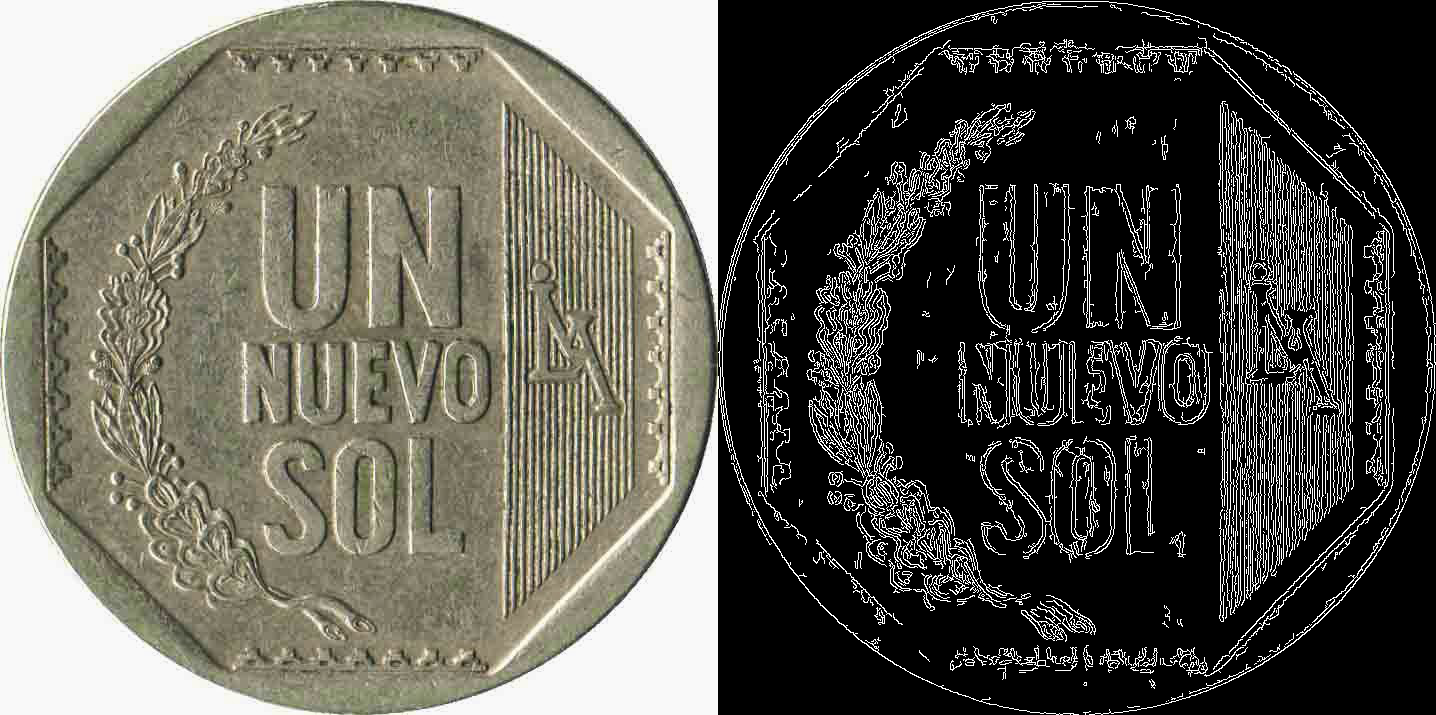

In [76]:
cv2_imshow(cv2.hconcat([df[3],cv2.cvtColor(df_canny[3],cv2.COLOR_GRAY2BGR)]))

###Cargando la imagen

In [13]:
imagen = io.imread("https://raw.githubusercontent.com/Carhuacusma/CC61_PDI_TA4_u201818067/main/monedas/fondoHoja.jpg")
print(type(imagen))

<class 'numpy.ndarray'>


In [14]:
baw = cv2.cvtColor(imagen,cv2.COLOR_RGB2GRAY)

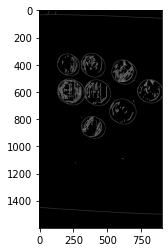

In [72]:
#@title Canny { run: "auto" }
minC = 40#@param{type:"slider", min:0, max:254, step:1}
maxC = 220#@param{type:"slider", min:0, max:255, step:1}
im_canny = cv2.Canny(baw,minC,maxC)
plt.imshow(im_canny,cmap='gray')

In [73]:
circulos, imCirc = HoughCirculo(im_canny,im_canny.shape[0]/30,maxC,50,50,120,imagen)

In [78]:
imMonedas = separarMonedas(circulos,baw)

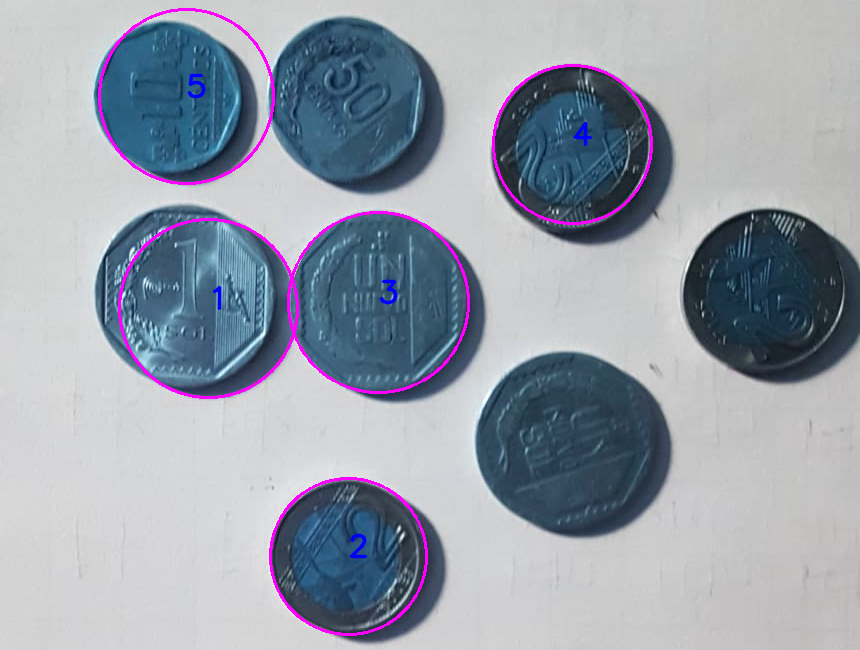

In [74]:
cv2_imshow(imCirc[300:950,40:,:])

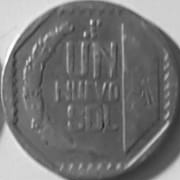

In [83]:
cv2_imshow(imMonedas[2])

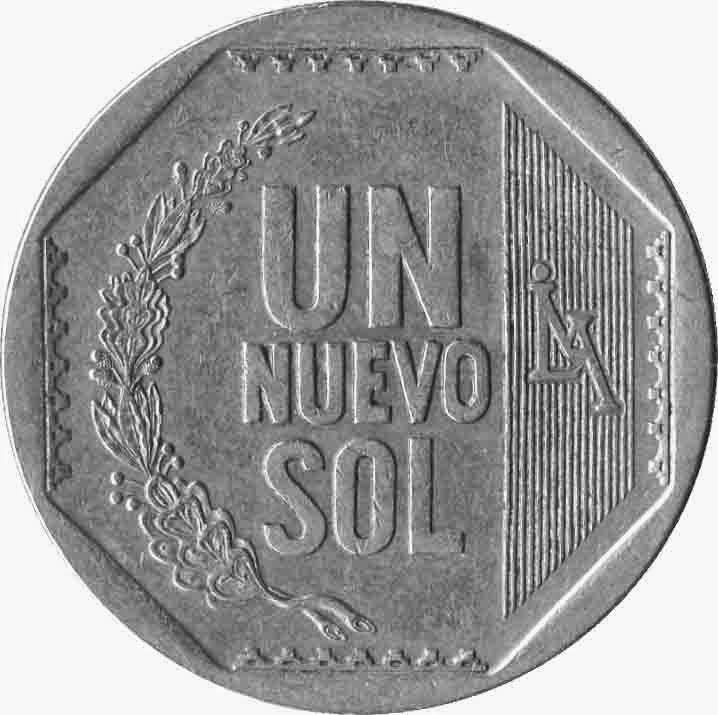

In [88]:
cv2_imshow(df[3])

In [89]:
compararIm(imMonedas[0],df[3],0.5)

0.42439099839002903


False

In [ ]:
radios = circulos[:,2] # Solamente el 3er atributo (radio) de todos los circulos
diam = [20.5,23,22,25.5,22.2,24.3] #Diametro en mm de las monedas
valores = [0.1,0.2,0.5,1,2,5]

In [ ]:
lineas, imLinea = HoughLineas(imMonedas[1],5,250)

## Conclusiones

## Bibliografía

* Sharifi, M., Fathy, M. & Tayefeh Mahmoudi, M. (2002) *A Classified and Comparative Study of Edge Detection Algorithms*. Recuperado de: https://d1wqtxts1xzle7.cloudfront.net/34225837/01000371.pdf?1405616223=&response-content-disposition=inline%3B+filename%3DA_Classified_and_Comparative_Study_of_Ed.pdf&Expires=1603141615&Signature=G5vV07WSN8ZB-lvqXGo1zZBjAzwqH4qSWBkv5CBbpmPeU47BV1rQfoMrmzLFDI8gqyLAycqoZt7bgLSA0aTgkA6C0RZDpKbXvLuwKrlVFgOBYoGp~5YEhTbKvsE7HClxTuGlG82a6hIi5RijGuzdXWMrfxfAWs3~jP5Zu92I2FVDRh-qbNWDwill--JVmLP2Gg5sKA1BEmbjJAZ7oYsbX9I8tiruHgJydaDVyOreZZ7QhnBV6yJFph7~kUZRLihJELKZtXyP84gSFrklQbkeK1V18fqDft--~dLU7sUcVURErnhXOL7M2iqcsx1dyzANUxqR6R9vC4WT12Vz3VyPdw__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA 
* Martinez, J. (2020) *Understanding and implementing shape detection using Hough Transform with OpenCV and Python*. Recuperado de: https://livecodestream.dev/post/2020-05-26-hough-transformation/ 
* Rani, R. & Kumari, S. (2016) *An approach of detecting discontinuities in images*. Recuperado de: https://pdfs.semanticscholar.org/55e0/6c28291d943aaa481ecd669bce328d54fe74.pdf 
* Programmer Sought. Roberts, Sobel, Prewitt TODO.Recuperado de: https://www.programmersought.com/article/2672737346/ 